





# Import Library

In [2]:
import pandas as pd
from os import getcwd
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
import re
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
!pip pd show

ERROR: unknown command "pd"


In [4]:
cwd = getcwd() + "/drive/Shareddrives/CAPSTONE_ML/all_data/"
print(cwd)

/content/drive/Shareddrives/CAPSTONE_ML/all_data/


# Data Wrangling

## 1. Gathering

In [5]:
dir = cwd
df_wedanguwuh = pd.read_excel(dir+'wedang_uwuh_solo.xlsx')
df_timlo = pd.read_excel(dir+'timlo_solo.xlsx')
df_tahok = pd.read_excel(dir+'tahok_solo.xlsx')
df_soto = pd.read_excel(dir+'soto_solo.xlsx')
df_serabi = pd.read_excel(dir+'serabi_solo.xlsx')
df_selat = pd.read_excel(dir+'selat_solo.xlsx')
df_segoliwet = pd.read_excel(dir+'sego_liwet_solo.xlsx')
df_satekere = pd.read_excel(dir+'sate_kere_solo.xlsx')
df_satebuntel = pd.read_excel(dir+'sate_buntel_solo.xlsx')
df_lenjongan = pd.read_excel(dir+'lenjongan_solo.xlsx')
df_gudeg = pd.read_excel(dir+'gudeg_solo.xlsx')
df_gendarpecel = pd.read_excel(dir+'gendar_pecel_solo.xlsx')
df_asle = pd.read_excel(dir+'es_wedang_asle.xlsx')
df_eskapal = pd.read_excel(dir+'es_kapal_solo.xlsx')
df_esgempol = pd.read_excel(dir+'es_gempol_pleret_solo.xlsx')
df_dawettelasih = pd.read_excel(dir+'es_dawet_telasih_solo.xlsx')
df_brambangasem = pd.read_excel(dir+'brambang_asem_solo.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/CAPSTONE_ML/all_data/wedang_uwuh_solo.xlsx'

In [ ]:
df_wedanguwuh.head()

In [ ]:
df_timlo.head()

In [ ]:
df_soto.head()

In [ ]:
df_serabi.head()

In [ ]:
df_selat.head()

In [ ]:
df_segoliwet.head()

In [ ]:
df_satekere.head()

In [ ]:
df_satebuntel.head()

In [ ]:
df_lenjongan.head()

In [ ]:
df_gudeg.head()

In [ ]:
df_gendarpecel.head()

In [ ]:
df_asle.head()

In [ ]:
df_eskapal.head()

In [ ]:
df_esgempol.head()

In [ ]:
df_dawettelasih.head()

In [ ]:
df_brambangasem.head()

## 2. Assesing

In [ ]:
df_all = pd.concat([df_wedanguwuh, df_timlo, df_tahok, df_soto, df_serabi, df_selat,
                    df_segoliwet, df_satekere, df_satebuntel, df_lenjongan, df_gudeg,
                    df_gendarpecel, df_asle, df_eskapal, df_esgempol, df_dawettelasih,
                    df_brambangasem], ignore_index=True)
df_all.rename(columns={"Text" : "Shop_name"}, inplace=True)
df_all.info()

**Insight**:
1. Terdapat beberapa kesalahan tipe data
2. Terdapat field yang seluruhnya null


In [ ]:
df_all.isnull().sum()

In [ ]:
df_all.duplicated().sum()
df_all['Shop_name'].duplicated().sum()

In [ ]:
df_all = df_all.drop_duplicates(subset='Shop_name', keep='first')
df_all.info()

## 3. Cleaning **Data**

### Memperbaiki Field Rating


In [ ]:
df_all['Rating'] = df_all['Rating'].apply(lambda x: f"{x}".replace(',', '.')).astype(float)
df_all["Rating"] = df_all["Rating"].fillna(0)

df_all.info()

**Insight**:
1. Mengganti tanda koma menjadi titik
2. Merubah tipe data menjadi float
3. Mengisi missing value dengan nilai 0

### Memperbaiki Field Reviews


In [ ]:
df_all["Reviews"] = df_all["Reviews"].astype(str)
df_all["Reviews"] = df_all["Reviews"].replace('nan','(0)') #mengganti nilai string kosong menjadi (0)

def numeric_review(text):
  result=re.sub(r"[()]", "", text)
  integer_result = int(result.replace('.', ''))
  return integer_result

df_all["Reviews"] = df_all["Reviews"].apply(numeric_review) #menghapus tanda kurung, menghilangkan tanda titik, dan merubah ke integer
df_all.info()

**Insight**:
1. Mengisi missing value dengan nilai 0
2. Mengambil nilai int dari reviews
3. Merubah tipe data menjadi int
4. Menghilangkan tanda kurung

In [ ]:
df_all['Reviews'][0]

In [ ]:
df_all_sort_rating = df_all.sort_values(by=['Rating','Reviews'], ascending=False)[:10]
df_all_sort_rating.head()

In [ ]:
df_all.info()

**Menghapus kolom yang tidak diperlukan**
1. Menghapus kolom website
2. Menghapus kolom photo

In [ ]:
df_all = df_all.drop(['Website', 'Photo'], axis = 1 )

In [ ]:
# df_all["Address"] = df_all["Address"].apply(lambda x: x[2:])
# df_all["Address"].apply(lambda x: print(x))
df_all["Address"]

In [ ]:
df_all.info()

In [ ]:
df_tahok["Kategori"].value_counts()

### Memperbaiki field Address

In [6]:
# Menghapus simbol-simbol yang tidak perlu di Address
def clean_address(address):
  if pd.isna(address):
    return address
  address = address.replace('\n', '').replace('\t', '').replace('\r', '').replace('','')
  address = re.sub(r'\s+', ' ', address).strip()
  return address
df_all["Address"] = df_all["Address"].apply(clean_address)

NameError: name 'df_all' is not defined

In [ ]:
df_all["Address"]

In [ ]:
# Menghapus address yang kosong
df_all = df_all.dropna(subset=['Address'])
empty_address_count = df_all["Address"].isnull().sum()
print(f"Number of empty addresses after dropping NaN: {empty_address_count}")

### Memperbaiki field phone number

In [ ]:
df_all["Phone_Number"] = df_all["Phone_Number"].fillna(0).astype(str)
df_all["Phone_Number"] = df_all["Phone_Number"].apply(lambda num: num.replace("-", ""))

**Insight**:
1. Mengisi missing value dengan nilai 0
2. Menghapus tanda (-)

In [1]:
df_all['Phone_Number']

NameError: name 'df_all' is not defined

### Memperbaiki field opening hours

In [ ]:
def parse_opening_hours(text):
    """Parses opening hours text into a dictionary.

    Args:
        text: The text containing the opening hours information.

    Returns:
        A dictionary where keys are days of the week and values are lists of opening hours.
    """

    opening_hours = {}
    lines = text.strip().split('\n')

    i = 0
    while i < len(lines):
        day = lines[i].strip()
        hours = []

        # Loop untuk menangani beberapa rentang waktu pada hari yang sama
        i += 1
        while i < len(lines) and not lines[i].startswith(('Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu')):
            hours.append(lines[i].strip())
            i += 1

        opening_hours[day] = hours

    return opening_hours


In [ ]:
df_all["Opening_Hours"].isna().sum()

In [ ]:
opening_hours_terbanyak = df_all["Opening_Hours"].value_counts().index[1]
print(opening_hours_terbanyak)

In [ ]:
df_all["Opening_Hours"] = df_all["Opening_Hours"].fillna(opening_hours_terbanyak)

In [ ]:
df_all["Opening_Hours"] = df_all["Opening_Hours"].apply(parse_opening_hours)

**Insight**:
1. Mengisi missing value dengan nilai buka yang paling banyak dan sesuai
2. Mengganti format data menjadi dictionary dengan hari sebagai key dan jam sebagai value dalam list

### Memperbaiki field range harga

In [ ]:
df_all["Range_Harga"].isna().sum()

In [ ]:
df_all["Range_Harga"] = df_all["Range_Harga"].fillna("Rp 1–25 rb")
df_all["Range_Harga"] = df_all["Range_Harga"].apply(lambda x: x.replace("\xa0", " "))

In [ ]:
df_all["Range_Harga"] = df_all["Range_Harga"].apply(lambda price: price.replace("$", "Rp 1–25 rb"))
df_all["Range_Harga"] = df_all["Range_Harga"].apply(lambda price: price.replace("$$", "Rp 1–25 rb"))
df_all["Range_Harga"] = df_all["Range_Harga"].apply(lambda price: price.replace("Rp 1-50.000", "Rp 1–50 rb"))
df_all["Range_Harga"] = df_all["Range_Harga"].apply(lambda price: price.replace("Rp 1–25.000", "Rp 1–25 rb"))
df_all["Range_Harga"] = df_all["Range_Harga"].apply(lambda x: x.replace("Rp 1–25 rbRp 1–25 rb", "Rp 1–25 rb"))

In [ ]:
df_all.head()

In [ ]:
df_all.info()

In [ ]:
df_all.isna().sum()

### Identifikasi Eco Friendly

In [ ]:
df_all["Kategori"].value_counts()

In [ ]:
eco_friendly =['Gudeg', 'Brambang Asem', 'Gendar Pecel', 'Sate Kere', 'Sate Buntel', 'Sego Liwet', 'Serabi', 'Lenjongan']
df_all["Eco_Friendly"] = df_all["Kategori"].apply(lambda x: 1 if x in eco_friendly else 0)

In [ ]:
df_all.head()

### Food with Weather Category

In [ ]:
food_weather={
    'Dingin/Panas': ['Serabi', 'Sate Kere', 'Sate Buntel', 'Gudeg', 'Gendar Pecel', 'Brambang Asem', 'Lenjongan'],
    'Dingin': ['Wedang Uwuh', 'Wedang Asle', 'Tahok', 'Timlo', 'Soto', 'Selat', 'Sego Liwet'],
    'Panas' : ['Es Gempol Pleret', 'Es Kapal', 'Es Dawet Telasih']
    }

def categorize_weather(food_item):
    for weather, foods in food_weather.items():
        if food_item in foods:
            return weather
    return None

df_all['Categorize_Weather'] = df_all['Kategori'].apply(categorize_weather)

In [ ]:
df_all.head(500)

## Export File xlsx

In [ ]:
# from google.colab import files
# df_all.to_csv('df_all.xlsx', encoding = 'utf-8-sig')
# files.download('df_all.xlsx')

# Exploratory Data Analysis

## 1. Perolehan 10 lokasi kuliner dengan rating tertinggi dan review terbanyak

In [ ]:
df_top_10 = df_all.sort_values(by=['Rating', 'Reviews'], ascending=False).head(10)
df_top_10

,Page_URL,Shop_name,Rating,Reviews,Kategori,Address,Phone_Number,Opening_Hours,Range_Harga,Deskripsi_Toko,Latitude,Longitude,Eco_Friendly,Categorize_Weather
309,https://www.google.com/maps/place/Warung+Selat...,"Warung Selat & Sop ""LEZATIE""",5.0,173,Selat,"Jl. Untung Suropati No.167, Sangkrah, Kec. Ps....",082136048048,"{'Senin': ['09.00–15.30'], 'Selasa': ['09.00–1...",Rp 1–25 rb,NaN,-7.580194,110.768192,0,Dingin
17,https://www.google.com/maps/place/Wedang+Uwuh+...,Wedang Uwuh JD,5.0,33,Wedang Uwuh,"Jurang Kambil, RT.01/RW.4, Jurangkambil, Jeruk...",081325586053,"{'Senin': ['08.00–22.00'], 'Selasa': ['08.00–2...",Rp 1–25 rb,NaN,-7.515739,110.780665,0,Dingin
610,https://www.google.com/maps/place/GUDEG+PLENGK...,GUDEG PLENGKUNG SOLO,5.0,30,Gudeg,"Perum Graha Mitra Berseri, Blok O satu, Wonore...",082328322678,"{'Minggu': ['Buka 24 jam'], 'Senin': ['Buka 24...",Rp 1–25 rb,NaN,-7.572865,110.688846,1,Dingin/Panas
8,https://www.google.com/maps/place/Wedang+Jahe+...,Wedang Jahe Merah Keraton Cabang Coyudan,5.0,26,Wedang Uwuh,"Jl. DR. Radjiman No.101, Kemlayan, Kec. Sereng...",0,"{'Senin': ['18.00–00.00'], 'Selasa': ['Tutup']...",Rp 1–25 rb,NaN,-7.547894,110.730811,0,Dingin
693,https://www.google.com/maps/place/ES+DAWET+AYU...,ES DAWET AYU SOLO BALAPAN,5.0,25,Es Dawet Telasih,"Jl. Walter Monginsidi, Kestalan, Kec. Banjarsa...",085879135881,"{'Senin': ['09.00–16.00'], 'Selasa': ['09.00–1...",Rp 1–25 rb,NaN,-7.557286,110.804599,0,Panas
221,https://www.google.com/maps/place/Serabi+Nakna...,Serabi Naknan,5.0,24,Serabi,"Pertokoan nusukan, Jl. Adi Sumarmo No.103, Nus...",08978954908,"{'Senin': ['07.00–20.00'], 'Selasa': ['07.00–2...",Rp 1–25 rb,NaN,-7.544877,110.742780,1,Dingin/Panas
303,https://www.google.com/maps/place/SELAT+MBAK+L...,SELAT MBAK LIN,5.0,20,Selat,"Karang kidul, RT.01/RW.16, Makamhaji, Kec. Kar...",085866501052,"{'Senin': ['08.00–17.00'], 'Selasa': ['08.00–1...",Rp 1–25 rb,NaN,-7.566844,110.518647,0,Dingin
612,https://www.google.com/maps/place/Nasi+Gudeg+B...,Nasi Gudeg Bu Puji Khas Solo,5.0,20,Gudeg,"Tegal Mulyo, RT.03/RW.08, Pabelan, Kec. Kartas...",08999390757,"{'Minggu': ['07.30–20.00'], 'Senin': ['07.30–2...",Rp 1–25 rb,NaN,-7.554392,110.611984,1,Dingin/Panas
607,https://www.google.com/maps/place/GUDEG+COYUDA...,GUDEG COYUDAN,5.0,19,Gudeg,"Jl. Dr. Rajiman COYUDAN No.126, Kemlayan, Kec....",08112698101,"{'Minggu': ['07.00–00.00'], 'Senin': ['07.00–0...",Rp 25–50 rb,NaN,-7.557978,110.673642,1,Dingin/Panas
223,https://www.google.com/maps/place/Serabi+ngruQ...,Serabi ngruQ,5.0,11,Serabi,"dahlian, Gg. Manggis I No.10, Ngruki, Cemani, ...",085227422398,"{'Senin': ['07.30–19.30'], 'Selasa': ['08.00–1...",Rp 1–25 rb,NaN,-7.580505,110.743412,1,Dingin/Panas


## 2. Perolehan 10 lokasi kuliner dengan ...

In [ ]:
df_eco_top_10 = df_all[df_all['Eco_Friendly'] == 1].sort_values(by=['Rating','Reviews'], ascending=False).head(10)
df_eco_top_10

,Page_URL,Shop_name,Rating,Reviews,Kategori,Address,Phone_Number,Opening_Hours,Range_Harga,Deskripsi_Toko,Latitude,Longitude,Eco_Friendly,Categorize_Weather
610,https://www.google.com/maps/place/GUDEG+PLENGK...,GUDEG PLENGKUNG SOLO,5.0,30,Gudeg,"Perum Graha Mitra Berseri, Blok O satu, Wonore...",082328322678,"{'Minggu': ['Buka 24 jam'], 'Senin': ['Buka 24...",Rp 1–25 rb,NaN,-7.572865,110.688846,1,Dingin/Panas
221,https://www.google.com/maps/place/Serabi+Nakna...,Serabi Naknan,5.0,24,Serabi,"Pertokoan nusukan, Jl. Adi Sumarmo No.103, Nus...",08978954908,"{'Senin': ['07.00–20.00'], 'Selasa': ['07.00–2...",Rp 1–25 rb,NaN,-7.544877,110.742780,1,Dingin/Panas
612,https://www.google.com/maps/place/Nasi+Gudeg+B...,Nasi Gudeg Bu Puji Khas Solo,5.0,20,Gudeg,"Tegal Mulyo, RT.03/RW.08, Pabelan, Kec. Kartas...",08999390757,"{'Minggu': ['07.30–20.00'], 'Senin': ['07.30–2...",Rp 1–25 rb,NaN,-7.554392,110.611984,1,Dingin/Panas
607,https://www.google.com/maps/place/GUDEG+COYUDA...,GUDEG COYUDAN,5.0,19,Gudeg,"Jl. Dr. Rajiman COYUDAN No.126, Kemlayan, Kec....",08112698101,"{'Minggu': ['07.00–00.00'], 'Senin': ['07.00–0...",Rp 25–50 rb,NaN,-7.557978,110.673642,1,Dingin/Panas
223,https://www.google.com/maps/place/Serabi+ngruQ...,Serabi ngruQ,5.0,11,Serabi,"dahlian, Gg. Manggis I No.10, Ngruki, Cemani, ...",085227422398,"{'Senin': ['07.30–19.30'], 'Selasa': ['08.00–1...",Rp 1–25 rb,NaN,-7.580505,110.743412,1,Dingin/Panas
493,https://www.google.com/maps/place/Wedangan+Kre...,"Wedangan Kresna & Sate Kere Solo ""Lombok Rawit...",5.0,11,Sate Kere,"Jl. A. Yani No.93, Gilingan, Kec. Banjarsari, ...",085790955307,"{'Minggu': ['17.00–00.00'], 'Senin': ['17.00–0...",Rp 1–25 rb,NaN,-7.556151,110.796085,1,Dingin/Panas
609,https://www.google.com/maps/place/Gudeg+Mbak+T...,"Gudeg Mbak Tutik, Lojiwetan",5.0,11,Gudeg,"CRGM+V63, Jl. Kapten Mulyadi, Kedung Lumbu, Ke...",0,"{'Minggu': ['Buka 24 jam'], 'Senin': ['Buka 24...",Rp 1–25 rb,NaN,-7.572865,110.688846,1,Dingin/Panas
626,https://www.google.com/maps/place/Gudeg+Jogja+...,Gudeg Jogja 22 Opane,5.0,10,Gudeg,"CRV3+W62 Stadium, Manahan, Kec. Banjarsari, Ko...",085848544584,"{'Minggu': ['09.00–01.00'], 'Senin': ['09.00–0...",Rp 1–25 rb,NaN,-7.563152,110.674829,1,Dingin/Panas
484,https://www.google.com/maps/place/Sate+kere+Mb...,Sate kere Mbak Tug ( Sate Presiden),5.0,9,Sate Kere,"Jl. RE. Martadinata No.53, Sudiroprajan, Kec. ...",087836036003,"{'Minggu': ['16.00–23.00'], 'Senin': ['16.00–2...",Rp 1–25 rb,NaN,-7.570300,110.797749,1,Dingin/Panas
269,https://www.google.com/maps/place/Serabi+Solo+...,Srabi Hitz Klewer,5.0,8,Serabi,"Jl. Merapi, Klewer, Sraten, Kec. Gatak, Kabupa...",085641952512,"{'Senin': ['05.00–12.00'], 'Selasa': ['05.00–1...",Rp 1–25 rb,NaN,-7.583826,110.764218,1,Dingin/Panas


## 3. Data 10 makanan yang cocok cuaca dingin dengan rating tertinggi

In [ ]:
df_dingin_top_10 = df_all[df_all['Categorize_Weather'] == 'Dingin'].sort_values(by=['Rating', 'Reviews'], ascending=False).head(10)
df_dingin_top_10

,Page_URL,Shop_name,Rating,Reviews,Kategori,Address,Phone_Number,Opening_Hours,Range_Harga,Deskripsi_Toko,Latitude,Longitude,Eco_Friendly,Categorize_Weather
309,https://www.google.com/maps/place/Warung+Selat...,"Warung Selat & Sop ""LEZATIE""",5.0,173,Selat,"Jl. Untung Suropati No.167, Sangkrah, Kec. Ps....",082136048048,"{'Senin': ['09.00–15.30'], 'Selasa': ['09.00–1...",Rp 1–25 rb,NaN,-7.580194,110.768192,0,Dingin
17,https://www.google.com/maps/place/Wedang+Uwuh+...,Wedang Uwuh JD,5.0,33,Wedang Uwuh,"Jurang Kambil, RT.01/RW.4, Jurangkambil, Jeruk...",081325586053,"{'Senin': ['08.00–22.00'], 'Selasa': ['08.00–2...",Rp 1–25 rb,NaN,-7.515739,110.780665,0,Dingin
8,https://www.google.com/maps/place/Wedang+Jahe+...,Wedang Jahe Merah Keraton Cabang Coyudan,5.0,26,Wedang Uwuh,"Jl. DR. Radjiman No.101, Kemlayan, Kec. Sereng...",0,"{'Senin': ['18.00–00.00'], 'Selasa': ['Tutup']...",Rp 1–25 rb,NaN,-7.547894,110.730811,0,Dingin
303,https://www.google.com/maps/place/SELAT+MBAK+L...,SELAT MBAK LIN,5.0,20,Selat,"Karang kidul, RT.01/RW.16, Makamhaji, Kec. Kar...",085866501052,"{'Senin': ['08.00–17.00'], 'Selasa': ['08.00–1...",Rp 1–25 rb,NaN,-7.566844,110.518647,0,Dingin
43,https://www.google.com/maps/place/Wedangan+Mas...,Jagung Bakar Kantor Pos Mbah Mur,5.0,8,Wedang Uwuh,"Galabo Kuliner Malam Solo, Jalan Jend Sudirman...",08122592667,"{'Senin': ['16.30–23.00'], 'Selasa': ['16.30–2...",Rp 1–25 rb,NaN,-7.557129,110.694612,0,Dingin
353,https://www.google.com/maps/place/Warung+Selat...,Selat Galantin Bu Damai,5.0,8,Selat,"CRCQ+RFJ, Jl. RE. Martadinata, Sangkrah, Kec. ...",081327045438,"{'Senin': ['11.00–15.00'], 'Selasa': ['11.00–1...",Rp 1–25 rb,NaN,-7.540142,110.521980,0,Dingin
30,https://www.google.com/maps/place/Wedangan+Mas...,"Swarga Tropica Wedang Uwuh, Teh, dan Rempah",5.0,7,Wedang Uwuh,"Perum tiara ardi, Jl. Melati 1 No.3, Dusun I, ...",08886891286,"{'Senin': ['08.00–16.00'], 'Selasa': ['08.00–1...",Rp 1–25 rb,NaN,-7.557129,110.694612,0,Dingin
36,https://www.google.com/maps/place/Wedangan+Mas...,Wedangan Ndelik Pak Bun,5.0,7,Wedang Uwuh,"CRJ2+G88, Gg. Latar Ireng 4, Bumi, Kec. Laweya...",081329672281,"{'Senin': ['Tutup'], 'Selasa': ['17.00–23.00']...",Rp 1–25 rb,NaN,-7.557129,110.694612,0,Dingin
113,https://www.google.com/maps/place/Tahok+Kemban...,Tahok Kembang Tahu Menco,5.0,6,Tahok,"Jl. Menco Raya No.1, Nilagraha, Gonilan, Kec. ...",087788770223,"{'Senin': ['06.00–21.00'], 'Selasa': ['06.00–2...",Rp 1–25 rb,NaN,-7.569240,106.995623,0,Dingin
660,https://www.google.com/maps/place/Wedang+Ronde...,Wedang Ronde dan Asle Pak Usman,5.0,6,Wedang Asle,"FR73+RH4, Jl. Tarumanegara I, Banyuanyar, Kec....",0,"{'Minggu': ['16.30–23.00'], 'Senin': ['16.30–2...",Rp 1–25 rb,NaN,-7.577369,110.756174,0,Dingin


In [ ]:
df_all.describe()

,Rating,Reviews,Latitude,Longitude,Eco_Friendly
count,607.000000,607.000000,607.000000,607.000000,607.000000
mean,4.282208,423.372323,-7.563622,110.649930,0.530478
std,1.207490,1349.901384,0.023294,0.406081,0.499482
min,0.000000,0.000000,-7.693490,106.995623,0.000000
25%,4.400000,3.000000,-7.576085,110.658049,0.000000
50%,4.600000,23.000000,-7.557978,110.694612,1.000000
75%,4.900000,226.000000,-7.546742,110.775705,1.000000
max,5.000000,15636.000000,-7.507090,110.860922,1.000000


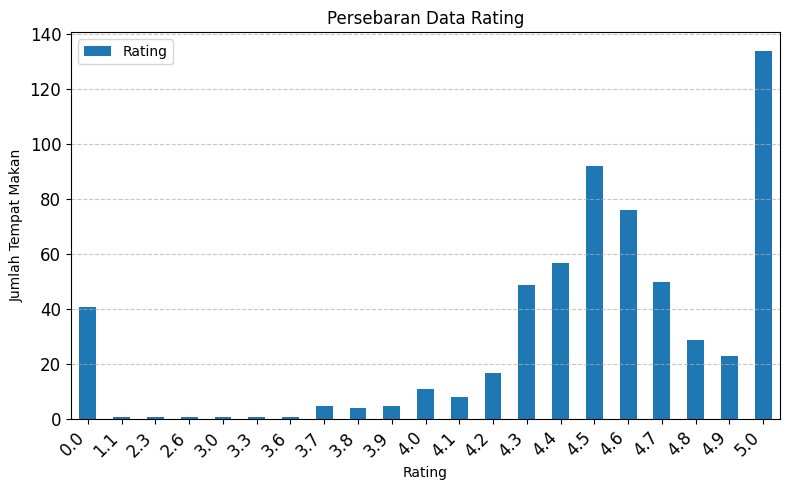

In [ ]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan 'Rating' dan menghitung jumlah tiap kategori
ratings = df_all.groupby("Rating").agg({"Rating": "count"})

# Mengatur ukuran figure
figsize = (8, 5)
fig, ax = plt.subplots(figsize=figsize)

# Membuat bar chart
ratings.plot.bar(ax=ax, fontsize="large")
ax.set_ylabel("Jumlah Tempat Makan")
ax.set(title="Persebaran Data Rating")
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu Y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Memiringkan label X untuk keterbacaan

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()


In [ ]:
df_all['Rating'].value_counts()

,count
Rating,
5.0,134
4.5,92
4.6,76
4.4,57
4.7,50
4.3,49
0.0,41
4.8,29
4.9,23


##Insight Analisis Eksplorasi
1. Persebaran empat makan dengan rating paling tinggi adalah 5 dengan jumlah tempat makan sebanyak 155 tempat
2. Pada cuaca dingin, terdapat 10 rekomendasi makanan dengan rating tertinggi.

In [ ]:
print(df_all[df_all["Shop_name"] == 'Soto mi khas bogor "mbak Yul"'])

longitude_pattern = '(?<=,)(-?\d+\.\d+)(?=,)'
latitude_pattern = '(?<=@)(.+?)(?=,)'

df_all['Latitude'] = df_all['Page_URL'].apply(lambda x: re.findall(latitude_pattern, x)[0])
df_all['Longitude'] = df_all['Page_URL'].apply(lambda x: re.findall(longitude_pattern, x)[0])

print(df_all[df_all["Shop_name"] == 'Soto mi khas bogor "mbak Yul"'])
print(df_all[df_all["Shop_name"] == 'Soto mi khas bogor "mbak Yul"']["Page_URL"])

                                              Page_URL  \
186  https://www.google.com/maps/place/Soto+Sekarta...   

                         Shop_name  Rating  Reviews Kategori  \
186  Soto mi khas bogor "mbak Yul"     5.0        1     Soto   

                                               Address Phone_Number  \
186  Jl. Raya Solo No.39-51, Tegalharjo, Kec. Jebre...            0   

                                         Opening_Hours Range_Harga  \
186  {'Senin': ['12.00–21.00'], 'Selasa': ['12.00–2...  Rp 1–25 rb   

    Deskripsi_Toko   Latitude    Longitude  Eco_Friendly Categorize_Weather  
186            NaN  -7.536801  110.6580492             0             Dingin  
                                              Page_URL  \
186  https://www.google.com/maps/place/Soto+Sekarta...   

                         Shop_name  Rating  Reviews Kategori  \
186  Soto mi khas bogor "mbak Yul"     5.0        1     Soto   

                                               Address Phone_Number 

# Export File Excel [Duplicated shop name]

In [ ]:
from google.colab import files
df_all.to_excel(getcwd() + '/drive/Shareddrives/CAPSTONE_ML/df_all[duplicated].xlsx', index=False)

In [ ]:
df_new = pd.read_excel(getcwd() + '/drive/Shareddrives/CAPSTONE_ML/df_all[duplicated].xlsx')
df_new['Page_URL'].duplicated().sum()

0

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Page_URL            607 non-null    object 
 1   Shop_name           607 non-null    object 
 2   Rating              607 non-null    float64
 3   Reviews             607 non-null    int64  
 4   Kategori            607 non-null    object 
 5   Address             607 non-null    object 
 6   Phone_Number        607 non-null    object 
 7   Opening_Hours       607 non-null    object 
 8   Range_Harga         607 non-null    object 
 9   Deskripsi_Toko      9 non-null      object 
 10  Latitude            607 non-null    float64
 11  Longitude           607 non-null    float64
 12  Eco_Friendly        607 non-null    int64  
 13  Categorize_Weather  607 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 66.5+ KB


In [ ]:
longitude_pattern = '(?<=,)(-?\d+\.\d+)(?=,)'
latitude_pattern = '(?<=@)(.+?)(?=,)'

df_new['Latitude'] = df_new['Page_URL'].apply(lambda x: re.findall(latitude_pattern, x)[0])
df_new['Longitude'] = df_new['Page_URL'].apply(lambda x: re.findall(longitude_pattern, x)[0])

# df_new.drop(['Deskripsi_Toko'], axis=1, inplace=True)

df_new.head()

,Page_URL,Shop_name,Rating,Reviews,Kategori,Address,Phone_Number,Opening_Hours,Range_Harga,Deskripsi_Toko,Latitude,Longitude,Eco_Friendly,Categorize_Weather
0,https://www.google.com/maps/place/Wedang+Uwuh+...,Wedang Uwuh Solo - Pak Aden,4.6,5,Wedang Uwuh,"Mutihan rt 04 rw 1, Surakarta, Sondakan, Kec. ...",082324006000,"{'Senin': ['08.00–20.00'], 'Selasa': ['08.00–2...",Rp 1–25 rb,NaN,-7.5667314,110.7169194,0,Dingin
1,https://www.google.com/maps/place/Rajanya+JAHE...,Rajanya JAHE REMPAH wedhang uwuh Sumber,4.6,32,Wedang Uwuh,"Jl. Letjen Suprapto No.76c, Sumber, Kec. Banja...",085641727445,"{'Minggu': ['Buka 24 jam'], 'Senin': ['Buka 24...",Rp 1–25 rb,NaN,-7.5667314,110.7169194,0,Dingin
2,https://www.google.com/maps/place/Wedang+uwuh+...,Wedang uwuh jelantik solo,5.0,1,Wedang Uwuh,"Jl. Sungai Musi No.1, Sangkrah, Kec. Ps. Kliwo...",081229070267,"{'Senin': ['Buka 24 jam'], 'Selasa': ['Buka 24...",Rp 1–25 rb,NaN,-7.576765,110.7682294,0,Dingin
3,https://www.google.com/maps/place/Wedang+uwuh+...,Wedang uwuh mbok tuo,4.9,14,Wedang Uwuh,"Jl. Kutai Tim. 5B, RT.05/RW.08, Sumber, Kec. B...",081578614885,"{'Senin': ['07.00–19.00'], 'Selasa': ['07.00–1...",Rp 1–25 rb,NaN,-7.5478945,110.7308112,0,Dingin
4,https://www.google.com/maps/place/wedang+uwuh+...,wedang uwuh sya,4.7,3,Wedang Uwuh,"Jl. Reksoniten No.20, Gajahan, Kec. Ps. Kliwon...",089608149211,"{'Minggu': ['Buka 24 jam'], 'Senin': ['Buka 24...",Rp 1–25 rb,NaN,-7.5478945,110.7308112,0,Dingin


In [ ]:
from google.colab import files
df_new.to_excel(getcwd() + '/drive/Shareddrives/CAPSTONE_ML/df_all_new.xlsx', index=False)
# files.download('df_all.xlsx')

In [ ]:
df_new[df_new["Reviews"] > 1000]

,Page_URL,Shop_name,Rating,Reviews,Kategori,Address,Phone_Number,Opening_Hours,Range_Harga,Deskripsi_Toko,Latitude,Longitude,Eco_Friendly,Categorize_Weather
7,https://www.google.com/maps/place/Wedangan+Nal...,Wedangan Nala Gareng,4.5,1581,Wedang Uwuh,"Jl. Basuki Rahmat No.6, RT.2/RW.12, Kerten, Ke...",081386055025,"{'Senin': ['16.30–00.00'], 'Selasa': ['16.30–0...",Rp 25–50 rb,NaN,-7.547894,110.730811,0,Dingin
12,https://www.google.com/maps/place/Wedangan+Pen...,Wedangan Pendhopo,4.5,2043,Wedang Uwuh,"Jl. Srigading I No.20, Mangkubumen, Kec. Banja...",0,"{'Senin': ['15.00–22.00'], 'Selasa': ['15.00–2...",Rp 25–50 rb,NaN,-7.562177,110.740551,0,Dingin
13,https://www.google.com/maps/place/Angkringan+O...,Angkringan Omahe Whawin,4.4,2170,Wedang Uwuh,"Jl. Kelud Selatan no.42, Jl. Nayu Utara Kelura...",0,"{'Senin': ['10.00–23.00'], 'Selasa': ['10.00–2...",Rp 25–50 rb,NaN,-7.562177,110.740551,0,Dingin
15,https://www.google.com/maps/place/Omah+Londo+A...,Omah Londo Angkringan,4.3,2597,Wedang Uwuh,"Jl. Agus Salim No.2A, Sondakan, Kec. Laweyan, ...",(0271) 713741,"{'Senin': ['08.00–23.00'], 'Selasa': ['08.00–2...",Rp 25–50 rb,NaN,-7.562177,110.740551,0,Dingin
20,https://www.google.com/maps/place/Wedangan+Man...,Wedangan Mantap,4.5,2572,Wedang Uwuh,"Jl. Sugiyopranoto No.12, Kp. Baru, Kec. Ps. Kl...",081802592816,"{'Senin': ['07.00–12.30', '16.00–22.30'], 'Sel...",Rp 25–50 rb,Kedai nyaman yang menyajikan menu klasik & min...,-7.567755,110.755403,0,Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,https://www.google.com/maps/place/Sate+Pak+Min...,"Tengkleng Solo Bu Jito ""Dlidir""",4.3,1293,Sate Buntel,"Jl. Kolonel Sugiyono No.67, Kadipiro, Kec. Ban...",085725244787,"{'Minggu': ['09.00–18.30'], 'Senin': ['09.00–1...",Rp 25–50 rb,NaN,-7.557588,110.534292,1,Dingin/Panas
498,https://www.google.com/maps/place/Gudeg+Mbak+Y...,Gudeg Mbak Yus,4.4,1136,Gudeg,"Jl. RA Kartini No.12, Timuran, Kec. Banjarsari...",081280205859,"{'Minggu': ['Buka 24 jam'], 'Senin': ['Buka 24...",Rp 25–50 rb,NaN,-7.557978,110.673642,1,Dingin/Panas
505,https://www.google.com/maps/place/Gudeg+Podhom...,Gudeg Podhomoro Relasi,4.7,1373,Gudeg,"Jl. Sidomulyo Gg. X No.14, Dusun II, Makamhaji...",0,"{'Minggu': ['12.00–22.30'], 'Senin': ['12.00–2...",Rp 1–25 rb,NaN,-7.557978,110.673642,1,Dingin/Panas
517,https://www.google.com/maps/place/Rumah+Makan+...,Rumah Makan Gudeg Bu Dul,4.4,2037,Gudeg,"Jl. Diponegoro No.88, Wirocanan, Kertonatan, K...",085741231102,"{'Minggu': ['08.00–21.00'], 'Senin': ['08.00–2...",Rp 25–50 rb,NaN,-7.552757,110.599204,1,Dingin/Panas
